<a href="https://colab.research.google.com/github/dhruv007patel/Digit-Recognition-using-CNN/blob/master/Digit_Recognition_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import keras
from keras.datasets import mnist
from keras.layers import Dense, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.models import Sequential
import matplotlib.pylab as plt

batch_size = 128
num_classes = 10
epochs = 10

# input image dimensions
img_x, img_y = 28, 28


In [0]:
# load the MNIST data set, which already splits into train and test sets for us
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [0]:
# reshape the data into a 4D tensor - (sample_number, x_img_size, y_img_size, num_channels)
# because the MNIST is greyscale, we only have a single channel - RGB colour images would have 3
x_train = x_train.reshape(x_train.shape[0], img_x, img_y, 1)
x_test = x_test.reshape(x_test.shape[0], img_x, img_y, 1)
input_shape = (img_x, img_y, 1)

In [8]:
# convert the data to the right type
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [0]:
# convert class vectors to binary class matrices - this is for use in the
# categorical_crossentropy loss below
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [0]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(5, 5), strides=(1, 1),
                 activation='relu',
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(1000, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

In [0]:
class AccuracyHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.acc = []

    def on_epoch_end(self, batch, logs={}):
        self.acc.append(logs.get('acc'))

history = AccuracyHistory()


In [12]:
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test),
          callbacks=[history])
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 89s 1ms/step - loss: 0.1522 - acc: 0.9535 - val_loss: 0.0514 - val_acc: 0.9828
Epoch 2/10
60000/60000 [==============================] - 88s 1ms/step - loss: 0.0409 - acc: 0.9873 - val_loss: 0.0298 - val_acc: 0.9902
Epoch 3/10
60000/60000 [==============================] - 89s 1ms/step - loss: 0.0281 - acc: 0.9914 - val_loss: 0.0242 - val_acc: 0.9918
Epoch 4/10
60000/60000 [==============================] - 88s 1ms/step - loss: 0.0200 - acc: 0.9937 - val_loss: 0.0368 - val_acc: 0.9896
Epoch 5/10
60000/60000 [==============================] - 88s 1ms/step - loss: 0.0159 - acc: 0.9948 - val_loss: 0.0308 - val_acc: 0.9907
Epoch 6/10
60000/60000 [==============================] - 89s 1ms/step - loss: 0.0130 - acc: 0.9955 - val_loss: 0.0401 - val_acc: 0.9881
Epoch 7/10
60000/60000 [==============================] - 88s 1ms/step - loss: 0.0105 - acc: 0.9966 - val_loss: 0.0266 - val_acc

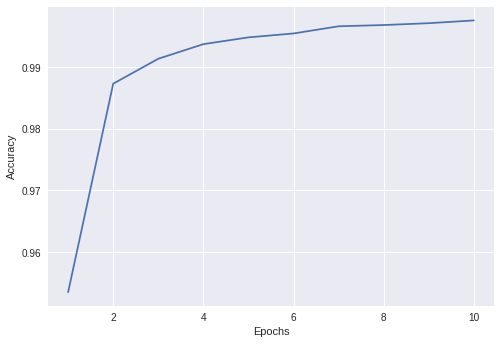

In [13]:
plt.plot(range(1, 11), history.acc)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()